In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

In [5]:
data_dir = 'D:/Projects/SignLanguage/Datasets/3'
csv_file = os.path.join(data_dir, 'all_points.csv')
points_df = pd.read_csv(csv_file)
points_df = points_df.drop(columns=points_df.columns[0])
points_df.head()

,img_path,p01x,p01y,p01z,p02x,p02y,p02z,p03x,p03y,p03z,...,p19x,p19y,p19z,p20x,p20y,p20z,p21x,p21y,p21z,label
0,D:\Projects\SignLanguage\Datasets\3\train\modi...,0.614687,0.650330,0.613934,0.547240,0.455732,0.735742,0.506779,0.368023,0.246893,...,-0.534376,-0.375736,-0.452833,-0.374390,-0.312543,-0.364270,-0.381599,-0.305080,-0.251992,ain
1,D:\Projects\SignLanguage\Datasets\3\train\modi...,0.684984,0.717935,0.661129,0.558398,0.457517,0.760490,0.563016,0.453179,0.357935,...,-0.405339,-0.298404,-0.363814,-0.307256,-0.260776,-0.290601,-0.309679,-0.252852,-0.213731,ain
2,D:\Projects\SignLanguage\Datasets\3\train\modi...,0.884905,0.873102,0.847407,0.793451,0.732096,0.929330,0.778688,0.684252,0.628135,...,-0.171997,-0.125023,-0.149121,-0.143353,-0.143065,-0.126971,-0.142955,-0.124430,-0.111550,ain
3,D:\Projects\SignLanguage\Datasets\3\train\modi...,0.753466,0.690966,0.624003,0.559315,0.516771,0.736109,0.594997,0.512949,0.468229,...,-0.179519,-0.112610,-0.145274,-0.133818,-0.123478,-0.109622,-0.132358,-0.120165,-0.106949,ain
4,D:\Projects\SignLanguage\Datasets\3\train\modi...,0.636902,0.604853,0.560117,0.498409,0.438277,0.624539,0.482306,0.405099,0.354415,...,-0.156611,-0.125454,-0.145964,-0.125568,-0.114130,-0.126392,-0.146397,-0.127257,-0.111724,ain


In [6]:
points_df['exists'] = [os.path.exists(x) for x in points_df.img_path]
filtered_df = points_df.query('exists == True').drop(columns=['img_path', 'exists'])
print(f"Removed {len(points_df) - len(filtered_df)} rows from dataset")

labels = [
	'ain', 'al', 'aleff','bb','dal','dha','dhad','fa','gaaf','ghain','ha','haa','jeem','kaaf','khaa','la','laam',
	'meem','nun','ra','saad','seen','sheen','ta','taa','thaa','thal','toot','waw','ya','yaa','zay'
	]
label2num = {x:i for i,x in enumerate(labels)}
print(f"Found {len(labels)} classes: {labels}")
print(label2num)
# print("Points")
# print(points_df.head())
# print("Filtered")
# print(filtered_df.head())

Removed 84 rows from dataset
Found 32 classes: ['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']
{'ain': 0, 'al': 1, 'aleff': 2, 'bb': 3, 'dal': 4, 'dha': 5, 'dhad': 6, 'fa': 7, 'gaaf': 8, 'ghain': 9, 'ha': 10, 'haa': 11, 'jeem': 12, 'kaaf': 13, 'khaa': 14, 'la': 15, 'laam': 16, 'meem': 17, 'nun': 18, 'ra': 19, 'saad': 20, 'seen': 21, 'sheen': 22, 'ta': 23, 'taa': 24, 'thaa': 25, 'thal': 26, 'toot': 27, 'waw': 28, 'ya': 29, 'yaa': 30, 'zay': 31}


In [7]:
X = filtered_df.drop('label', axis=1)
y = np.array([label2num[label] for label in filtered_df['label']], dtype=int)
print(type(y))
X_train, X_test, y_train, y_test = train_test_split(
	X, y, 
	test_size=0.2, random_state=42
)
# X_train, y_train

<class 'numpy.ndarray'>


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler_file = os.path.join(data_dir, 'data_scaler.pkl')
pickle.dump(scaler, open(scaler_file, 'wb'))
print(f"Scaler is saved into {scaler_file}")
# X_train_scaled
# print(X_train_scaled/X_train)

Scaler is saved into D:/Projects/SignLanguage/Datasets/3\data_scaler.pkl


In [24]:
tf.random.set_seed(42)
model = Sequential([
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.2),
	layers.Dense(256, activation='relu'),
	layers.Dropout(0.35),
	# layers.Dense(256, activation='relu'),
	# layers.Dropout(0.4),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.2),
	layers.Dense(len(labels), activation='relu')
])
model.compile(
	loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	optimizer = 'adam', metrics=['accuracy'])
model.build(input_shape=(1,63))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (1, 128)                  8192      
                                                                 
 dropout_23 (Dropout)        (1, 128)                  0         
                                                                 
 dense_30 (Dense)            (1, 256)                  33024     
                                                                 
 dropout_24 (Dropout)        (1, 256)                  0         
                                                                 
 dense_31 (Dense)            (1, 128)                  32896     
                                                                 
 dropout_25 (Dropout)        (1, 128)                  0         
                                                                 
 dense_32 (Dense)            (1, 32)                  

In [25]:
epochs = 100
history = model.fit(X_train_scaled, y_train, epochs=epochs)

Epoch 1/100
330/330 [==============================] - 2s 5ms/step - loss: 2.4146 - accuracy: 0.3293
Epoch 2/100
330/330 [==============================] - 2s 5ms/step - loss: 1.2306 - accuracy: 0.6430
Epoch 3/100
330/330 [==============================] - 2s 5ms/step - loss: 0.8829 - accuracy: 0.7352
Epoch 4/100
330/330 [==============================] - 2s 5ms/step - loss: 0.7359 - accuracy: 0.7848
Epoch 5/100
330/330 [==============================] - 2s 5ms/step - loss: 0.6479 - accuracy: 0.8118
Epoch 6/100
330/330 [==============================] - 1s 2ms/step - loss: 0.6056 - accuracy: 0.8250
Epoch 7/100
330/330 [==============================] - 1s 2ms/step - loss: 0.5671 - accuracy: 0.8379
Epoch 8/100
330/330 [==============================] - 1s 3ms/step - loss: 0.5413 - accuracy: 0.8431
Epoch 9/100
330/330 [==============================] - 1s 3ms/step - loss: 0.5202 - accuracy: 0.8488
Epoch 10/100
330/330 [==============================] - 1s 3ms/step - loss: 0.4584 - accura

In [39]:
predictions = model.predict(X_test_scaled)
scores = [tf.nn.softmax(pred) for pred in predictions]
predictions = [np.argmax(score) for score in scores]
# print(predictions)
correct_labels = [i for i, (pred, actual) in enumerate(zip(predictions, y_test)) if pred == actual]
print(f"Predicted overall {len(correct_labels)}/{len(y_test)} ({100*len(correct_labels)/len(y_test):.2f}%) correctly")
correct_freq = {label:[0, 0] for label in y_test}
for pred, actual in zip(predictions, y_test):
	correct_freq[actual][1] += 1
	correct_freq[actual][0] += 1 if pred == actual else 0
print('\n'.join([f'{labels[actual]}: {correct_freq[actual][0]}/{correct_freq[actual][1]} '
		f'({100*correct_freq[actual][0]/correct_freq[actual][1]:.2f}%)' for actual in set(y_test)]))

Predicted overall 2469/2639 (93.56%) correctly
ain: 82/82 (100.00%)
al: 93/93 (100.00%)
aleff: 81/83 (97.59%)
bb: 88/88 (100.00%)
dal: 76/77 (98.70%)
dha: 82/82 (100.00%)
dhad: 71/73 (97.26%)
fa: 76/81 (93.83%)
gaaf: 84/89 (94.38%)
ghain: 79/79 (100.00%)
ha: 0/94 (0.00%)
haa: 61/68 (89.71%)
jeem: 87/87 (100.00%)
kaaf: 88/94 (93.62%)
khaa: 65/68 (95.59%)
la: 80/82 (97.56%)
laam: 74/77 (96.10%)
meem: 70/70 (100.00%)
nun: 61/65 (93.85%)
ra: 78/80 (97.50%)
saad: 80/83 (96.39%)
seen: 101/108 (93.52%)
sheen: 76/76 (100.00%)
ta: 80/81 (98.77%)
taa: 89/92 (96.74%)
thaa: 69/69 (100.00%)
thal: 76/78 (97.44%)
toot: 82/88 (93.18%)
waw: 92/100 (92.00%)
ya: 64/67 (95.52%)
yaa: 102/102 (100.00%)
zay: 82/83 (98.80%)


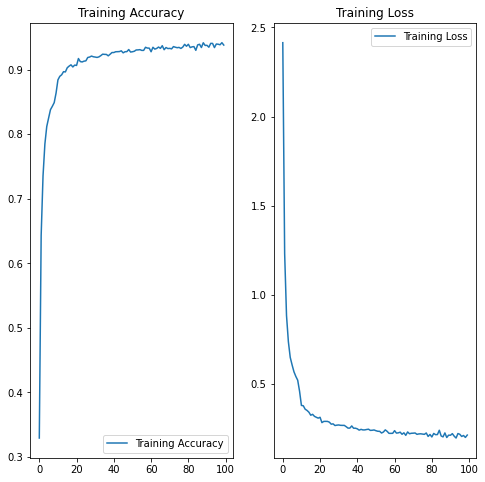

In [27]:
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [28]:
model.save('saved_models/sign_letters_detection_03_points_04')

INFO:tensorflow:Assets written to: saved_models/sign_letters_detection_03_points_04\assets
